## PDE solving using relaxation method

Based on code  in U Mass, lecture handouts by Donald Candela
Using the LAPLACE/Poisson equation to solve for voltage in a 1m x 1m square with a given set of boundary conditions. 


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
"""relxation method  """
def relaxation(vv, dvvmax, om):
    # Relaxation calculation:
    sweeps = 0
    while True:
        dvvbig = 0.0   # will hold biggest Delta-V in this sweep   
        for j in range(1,nn-1):
            for k in range(1,nn-1):
                avn = 0.25*(vv[j+1,k]+vv[j-1,k]+vv[j,k+1]+vv[j,k-1])
                dvv = (1+om)*(avn - vv[j,k])
                vv[j,k] += dvv
                dvvbig = max(dvvbig,abs(dvv))
        sweeps += 1
        if dvvbig < dvvmax:  # quit when dvvbig is small enough
            break
    return vv

In [7]:
""" A few plotting functions """
def plot_potential(vv):
    # Use imshow to make density plot of the potential:
    plt.rc('font',size=15)
    plt.figure(figsize=(8,5))
    plt.imshow(vv,origin='lower',extent=(0,ll,0,ll))
    plt.colorbar()
    plt.xlabel(r'$x$ (m)')
    plt.ylabel(r'$y$ (m)')
    plt.title(r'$V(x,y)$ (V)')
    plt.show()

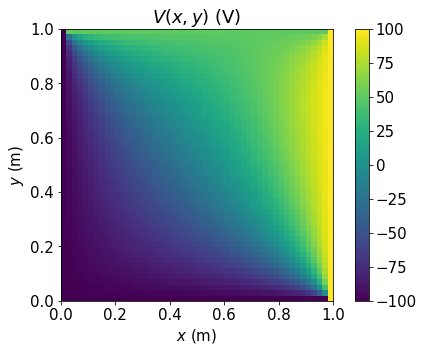

In [8]:
"""Solve Laplace equation in a square using relaxation method."""


# Define the problem:
ll = 1.0      # size of square L (m)
vvbot = -100. # voltage on bottom edge (V)
vvtop = 50.   # voltage on top edge (V)
vvlft = -100. # voltage on left edge (V)
vvrht = 100.  # voltage on right edge (V)

# Parameters for relaxation-method solution:
nn = 50       # grid pts on each edge
dvvmax = 0.01 # stop when V changes less than this (V)
om = 0.9      # over relaxation parameter

# Set up array of potentials and set boundary values
# (using first index for y, second for x):
vv = np.zeros((nn,nn))
vv[0,:] = vvbot   # V(first y, all x's) = V(bottom)
vv[-1,:] = vvtop  # V(last y, all x's) = V(top)
vv[:,0] = vvlft   # V(all y's, first x) = V(left)
vv[:,-1] = vvrht  # V(all y's, last x) = V(right)


vv = relaxation(vv, dvvmax, om)                                


plot_potential(vv)